In [1]:
# Connect the colab notebook with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning and Preparations


In [2]:
# import necessary packages

import os
import random
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.corpus  
from nltk.text import Text  
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('gutenberg')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
# To begin working with the dataset  read the dataset folder and check the type of files inside the directory

directory = "/content/drive/MyDrive/nlp_surya/dataset"
all_files=os.listdir(directory)
all_files


['10267.txt',
 '10268.txt',
 '10274.txt',
 '10291.txt',
 '10292.txt',
 '10294.txt',
 '10310.txt',
 '10314.txt',
 '10315.txt',
 '10316.txt',
 '10317.txt',
 '10318.txt',
 '10319.txt',
 '10320.txt',
 '10321.txt',
 '10322.txt',
 '10323.txt',
 '10324.txt',
 '10325.txt',
 '10326.txt',
 '10327.txt',
 '10328.txt',
 '10329.txt',
 '10331.txt',
 '10332.txt',
 '10333.txt',
 '10335.txt',
 '10336.txt',
 '10337.txt',
 '10338.txt',
 '10340.txt',
 '10341.txt',
 '10342.txt',
 '10343.txt',
 '10348.txt',
 '10350.txt',
 '10351.txt',
 '10352.txt',
 '10355.txt',
 '10356.txt',
 '10357.txt',
 '10358.txt',
 '10359.txt',
 '10360.txt',
 '10361.txt',
 '10362.txt',
 '10363.txt',
 '10364.txt',
 '10366.txt',
 '10368.txt',
 '10369.txt',
 '10370.txt',
 '10371.txt',
 '10372.txt',
 '10374.txt',
 '10375.txt',
 '10376.txt',
 '10377.txt',
 '10378.txt',
 '10379.txt',
 '10380.txt',
 '10381.txt',
 '10382.txt',
 '10383.txt',
 '10386.txt',
 '10387.txt',
 '10388.txt',
 '10389.txt',
 '10390.txt',
 '10391.txt',
 '10392.txt',
 '1039

In [4]:
# From the previous result it is clear that the files inside the folder are text files
len(all_files)

1176

In [5]:
# By executing this command we can read random text files from the folder and see the contents iside the text files

random_number=random.randint(0, len(all_files))
random_number

dummy_file = os.path.join(directory,all_files[random_number])

with open(dummy_file,'r') as tf:
    text = tf.read()
    
print(text)

The Project Gutenberg EBook of Social life at Rome in the Age of Cicero
by W. Warde Fowler

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Social life at Rome in the Age of Cicero

Author: W. Warde Fowler

Release Date: February 24, 2004 [EBook #11256]

Language: English

Character set encoding: ASCII

*** START OF THIS PROJECT GUTENBERG EBOOK SOCIAL LIFE AT ROME ***




Produced by Ted Garvin, Nicolas Hayes and PG Distributed Proofreaders




SOCIAL LIFE AT ROME IN THE AGE OF CICERO

BY W. WARDE FOWLER, M.A.

  'Ad illa mihi pro se quisque acriter intendat animum,
  quae vita, quae mores fuerint.'--LIVY, _Praefatio_.




AMICO VETERRIMO

I.A. STEWART

ROMAE PRIMUM VISAE

COMES MEMOR

D.D.D.




PREFATORY NOTE

This book was originally intended to be a companion to Professor
Tuc

## Exploratory Data Analysis


In [6]:
# After executing the previous command several times it is clear that the dataset contain different e-books 
# Hence we check the dataset contains the books of howmany different authors


author_list=[]
for i in all_files:
    if i.endswith(".txt"):
        file = os.path.join(directory,i)
        with open(file,'r',encoding='iso-8859-15') as fid:
            text = fid.read()
            for line in re.findall("Author:.*", text):
                author_list.append(line)

unique_authors = len(set(author_list))
print(unique_authors)       

679


In [7]:
# Choose the author whos book are more in this folder
author_counter = Counter(author_list)
author_counter.most_common()

[('Author: Various', 200),
 ('Author: W.W. Jacobs', 52),
 ('Author: Anonymous', 30),
 ('Author: Roger McGuinn', 30),
 ('Author: Charles Kingsley', 14),
 ('Author: John Lord', 14),
 ('Author: Unknown', 11),
 ('Author: James D. Richardson', 8),
 ('Author: Richard Le Gallienne', 7),
 ('Author: Arthur Schopenhauer', 7),
 ('Author: Max Brand', 6),
 ('Author: Edith Van Dyne', 6),
 ('Author: James Fenimore Cooper', 6),
 ('Author: Samuel Johnson', 5),
 ('Author:', 5),
 ('Author: Algernon Blackwood', 5),
 ('Author: American Anti-Slavery Society', 5),
 ('Author: E. Phillips Oppenheim', 4),
 ('Author: George MacDonald', 4),
 ('Author: Arthur Conan Doyle', 4),
 ('Author: Helen Hunt Jackson', 4),
 ('Author: William Hope Hodgson', 4),
 ('Author: James Oliver Curwood', 4),
 ('Author: Lord Dunsany', 4),
 ('Author: Edited by James D. Richardson', 4),
 ('Author: John Moncure Wetterau', 4),
 ('Author: Margaret O. (Wilson) Oliphant', 4),
 ('Author: William Godwin', 3),
 ('Author: Thomas Clarkson', 3),
 ('

## Descriptive Analytics


In [8]:
# For further analysis lets take an author with 3 books 

author = 'Author: Various'
all_files=os.listdir(directory)
books=[]
for i in all_files:
    if i.endswith(".txt"):
        file = os.path.join(directory,i)
        with open(file,'r',encoding='iso-8859-15') as fid:
            text = fid.read()
            for line in re.findall("Author:.*", text):
                if line== author:
                    books.append(i)

In [9]:
books

['10292.txt',
 '10331.txt',
 '10332.txt',
 '10336.txt',
 '10388.txt',
 '10435.txt',
 '10445.txt',
 '10448.txt',
 '10450.txt',
 '10454.txt',
 '10456.txt',
 '10464.txt',
 '10467.txt',
 '10471.txt',
 '10475.txt',
 '10544.txt',
 '10550.txt',
 '10588.txt',
 '10589.txt',
 '10594.txt',
 '10595.txt',
 '10614.txt',
 '10626.txt',
 '10656.txt',
 '10663.txt',
 '10666.txt',
 '10695.txt',
 '10699.txt',
 '10711.txt',
 '10719.txt',
 '10721.txt',
 '10730.txt',
 '10734.txt',
 '10838.txt',
 '10845.txt',
 '10854.txt',
 '10867.txt',
 '10896.txt',
 '10903.txt',
 '10923.txt',
 '10933.txt',
 '10934.txt',
 '10950.txt',
 '10952.txt',
 '10964.txt',
 '11032.txt',
 '11061.txt',
 '11076.txt',
 '11087.txt',
 '11094.txt',
 '11103.txt',
 '11109.txt',
 '11112.txt',
 '11117.txt',
 '11118.txt',
 '11129.txt',
 '11133.txt',
 '11134.txt',
 '11154.txt',
 '11155.txt',
 '11157.txt',
 '11158.txt',
 '11159.txt',
 '11169.txt',
 '11170.txt',
 '11173.txt',
 '11177.txt',
 '11179.txt',
 '11180.txt',
 '11196.txt',
 '11201.txt',
 '1121

In [10]:
# Get the average number of words per sentence
books_info =[]
for i in books:
    book_info = {}
    paragraphcount = 0
    linecount = 0
    book_path =os.path.join(directory,i)
    with open(book_path,'r') as bk:
        read_book = bk.read()
    word_tokens = word_tokenize(read_book)
    sent_tokens = sent_tokenize(read_book)
    avg_no_words_per_sent=int(len(word_tokens)/len(sent_tokens))
    book_info["Avg_no_words_sent"]= avg_no_words_per_sent
    book_info["File_name"]= i
    with open(book_path,'r') as para:
        for line in para.readlines():
            if line in ('\n', '\r\n'):
                if linecount == 0:
                    paragraphcount = paragraphcount + 1
                linecount = linecount + 1
    # print(linecount,paragraphcount)
    book_info["no_paragraphs"] = paragraphcount
    books_info.append(book_info)
    books_info

## Analyse single file

A single file is taken for further analysis.The word cloud is created to see the freequency of words in tye file.Also a linegraph is created to corss checknthe findings from the word cloud.

In [11]:
selected_file = os.path.join(directory,all_files[random.randint(0, len(all_files))])

with open(selected_file,'r') as tf:
        text = tf.read()
        


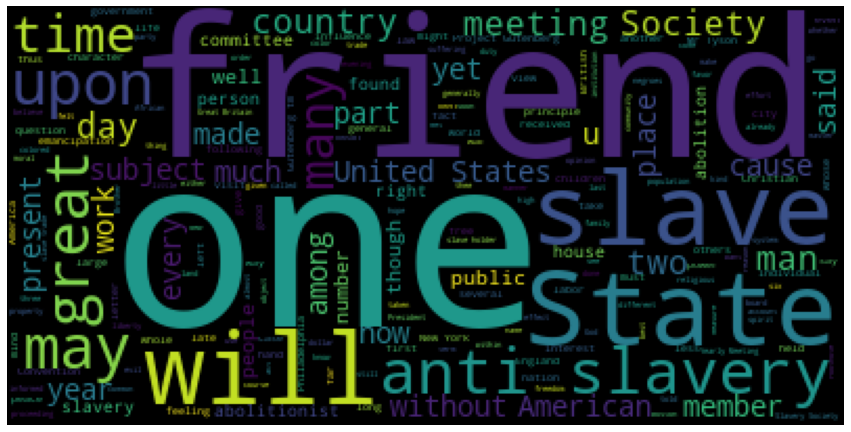

In [12]:
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black').generate(text)
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
def word(path):
    with open(path,'r') as tf:
        text = tf.read()
    paragraphs = text.split('\n\n')
    paragraphs = [i.replace('\n',' ').replace('*',' ').replace('-',' ')
                  .replace('!',' ').replace('[',' ').replace(']',' ') 
                  .replace('/',' ').replace('_',' ').replace('(',' ')
                  .replace(')',' ').replace(';',' ').replace('?',' ')
                  .replace('0',' ').replace('1',' ').replace('2',' ')
                  .replace('3',' ').replace('4',' ').replace('5',' ')
                  .replace('6',' ').replace('7',' ').replace('8',' ')
                  .replace('9',' ').replace('#',' ').replace(':',' ') 
                  .replace('&',' ').replace('-',' ')
                  for i in paragraphs]
    sentences = [i for j in paragraphs for i in j.split('.')]
    final_words = []
    all_stopwords = stopwords.words('english')
    for words in sentences:
        word_list = words.strip().split()
        for word in word_list:
            lower_word = word.lower()
            if not lower_word in all_stopwords:
                if not lower_word==',':
                    final_words.append(lower_word)
    return final_words
words = word(selected_file)

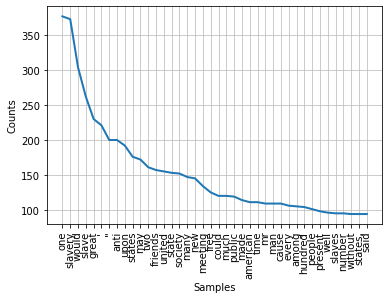

In [14]:
fdist = FreqDist(words)
fdist.plot(40,cumulative=False)
plt.show()

In [15]:

analyser = SentimentIntensityAnalyzer()

        
paragraphs = text.split('\n\n')
sentences = [i for j in paragraphs for i in j.split('.')]

score_list=[]
for i in sentences:
    scores = analyser.polarity_scores(i)
    # print(scores)
    score_list.append(scores)

negative_score=[]
positive_score=[]
compound_scores=[]
neutral_scores=[]

for i in score_list:
    neg_score=i.get('neg')
    negative_score.append(neg_score)
    pos_score=i.get('pos')
    positive_score.append(pos_score)
    neu_score=i.get('neu')
    neutral_scores.append(neu_score)
    compound_score=i.get('compound')
    compound_scores.append(compound_score)

avg_pos_score=sum(positive_score)/len(positive_score)
print("Average positive score:",avg_pos_score)
avg_neg_score=sum(negative_score)/len(negative_score)
print("Average negative score:",avg_neg_score)
avg_neu_score=sum(neutral_scores)/len(neutral_scores)
print("Average neutral score:",avg_neu_score)
avg_comp_score=sum(compound_scores)/len(compound_scores)
print("Average compound score:",avg_comp_score)

Average positive score: 0.08000813835198385
Average negative score: 0.040284842319430324
Average neutral score: 0.6805222787385562
Average compound score: 0.12289873855544235


In [17]:
# Check the sentence that contain the most common word
textList = Text(nltk.corpus.gutenberg.words(selected_file))
textList.concordance('friend')

Displaying 25 of 98 matches:
ence , and other documents , by the friend who accompanied me on a former jour
ere I met , for the first time , my friend J . G . Whittier , whom I had been 
nd professing the principles of a " Friend ." The change described , was effec
d Abolition Society ," is a devoted friend to the anti - slavery cause . The s
manner , and said , ' My dear young friend , I was very glad to hear thy voice
nd , presented by William Penn to a friend , to enable him to keep a cow , whi
 next meeting of the Committee . My friend , Daniel Neall , at whose house thi
 he was dragged from the house of a friend in Delaware , and tarred and feathe
 was accustomed to send them to our friend for investigation ; he added that s
sly allowed me , in company with my friend , J . G . Whittier , to visit thy s
ay we visited thy establishment , a friend with whom I was dining informed me 
as he had been unable to do so , my friend had no doubt they had been sent off
d good will towards thy